In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read data
data = pd.read_csv("Melbourne_housing_Full.csv")

# EXPLORATORY DATA ANALYSIS

In [3]:
data.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [5]:
#shape of data
data.shape

(34857, 21)

In [6]:
#size of data
data.size

731997

In [7]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [8]:
#Check for any duplicates
df = data.copy()
df.duplicated().sum()
df.loc[df.duplicated(keep=False), :]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15857,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0


In [9]:
#Remove duplicates
df.drop_duplicates(inplace=True)

In [10]:
#Check for any duplicates
df.duplicated().sum()

0

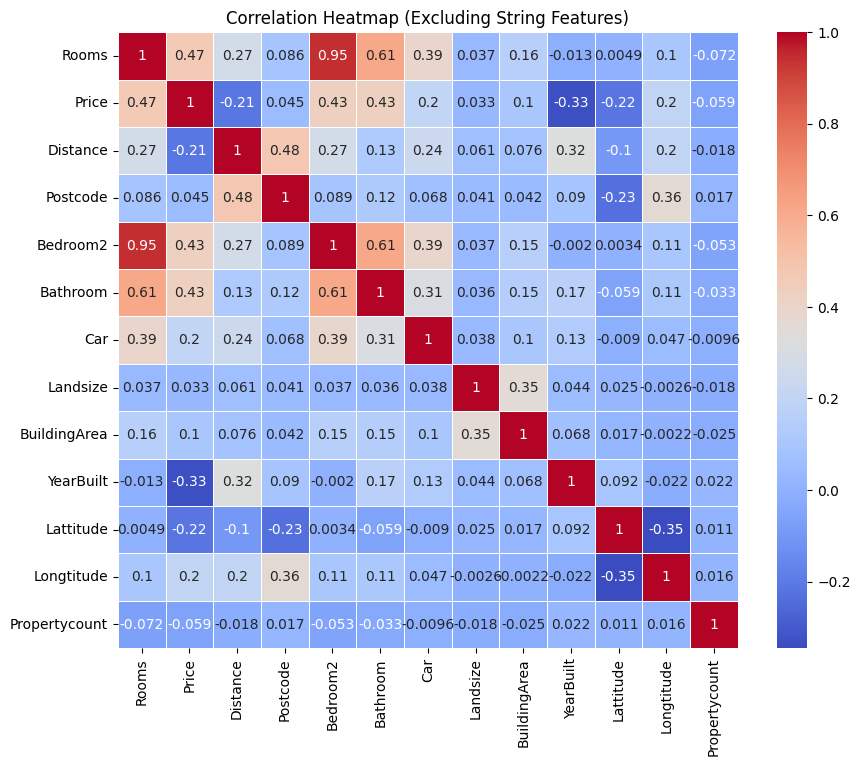

In [11]:
data_corr = df.select_dtypes(exclude=['object'])

#Compute the correlation matrix
correlation_matrix = data_corr.corr()

#Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap (Excluding String Features)")
plt.show()

In [12]:
#Unique values in each column
df.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [13]:
#Check for missing values
df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7609
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

<Axes: >

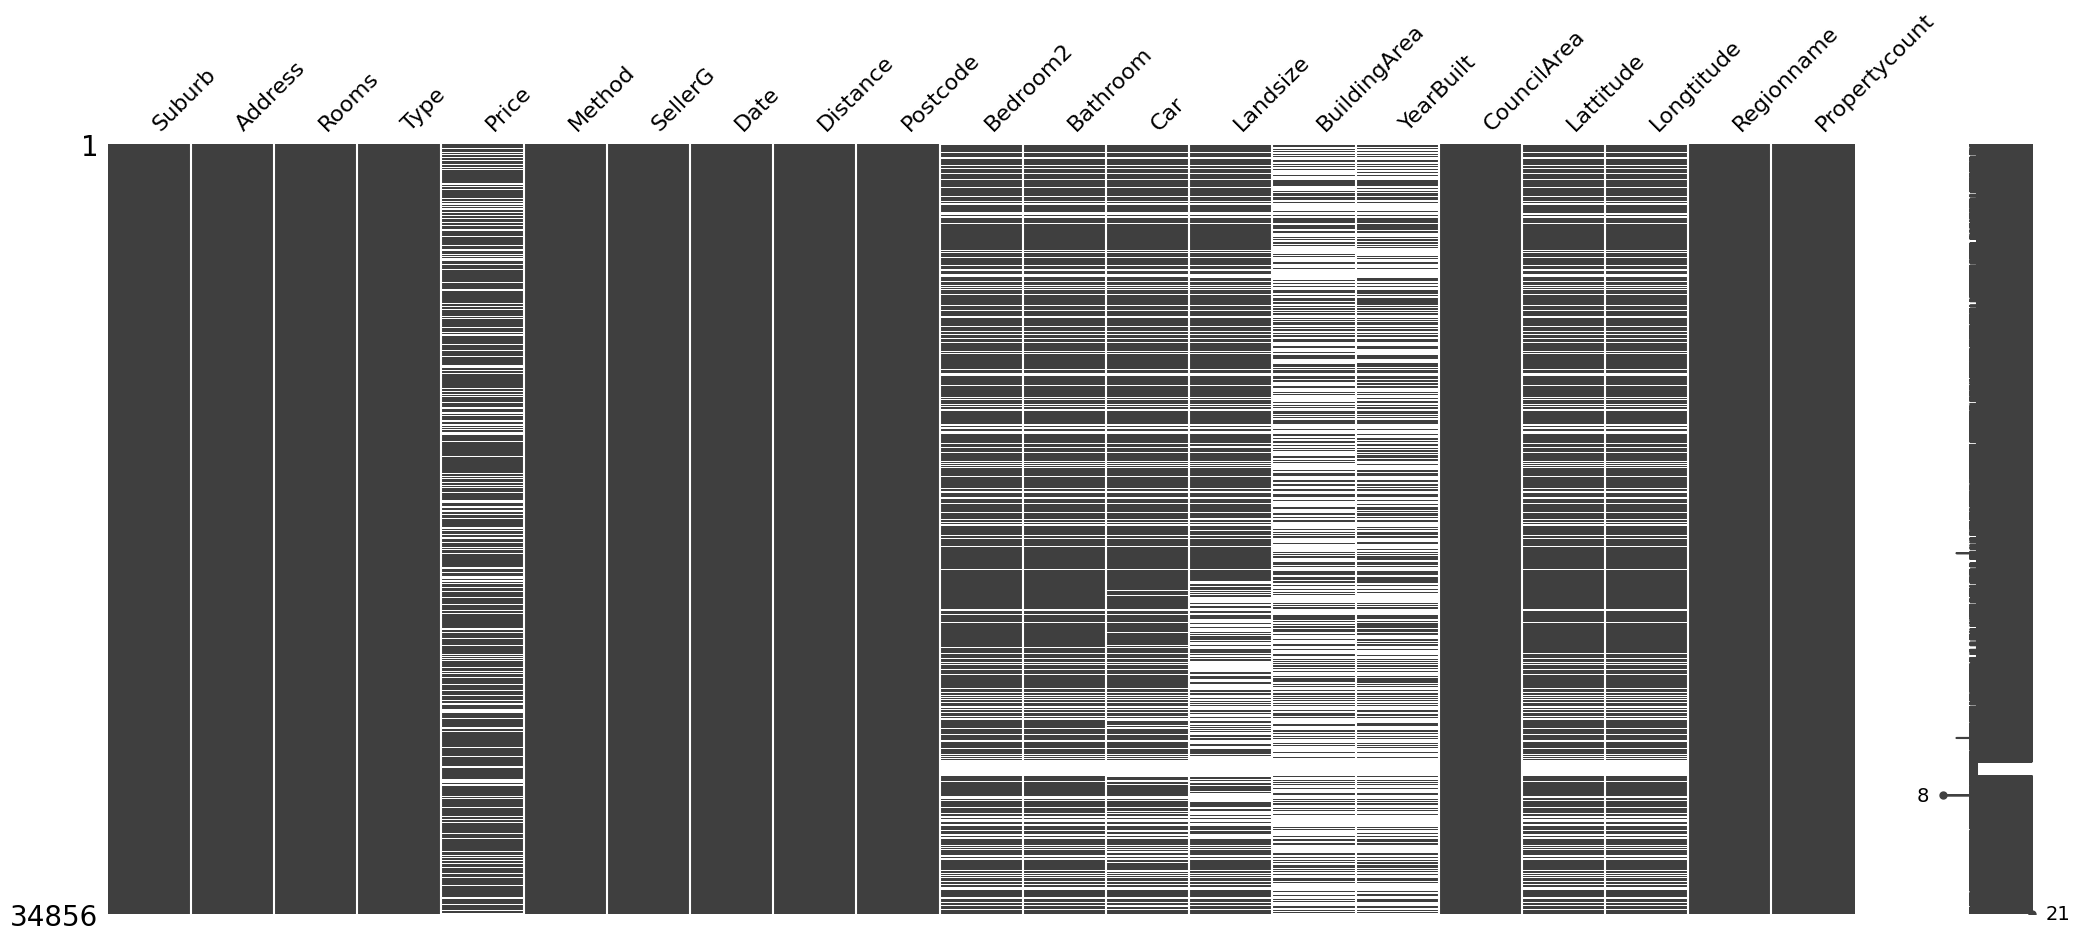

In [14]:
#show the matrix of missing values 
import missingno as msno
msno.matrix(df)

<Axes: >

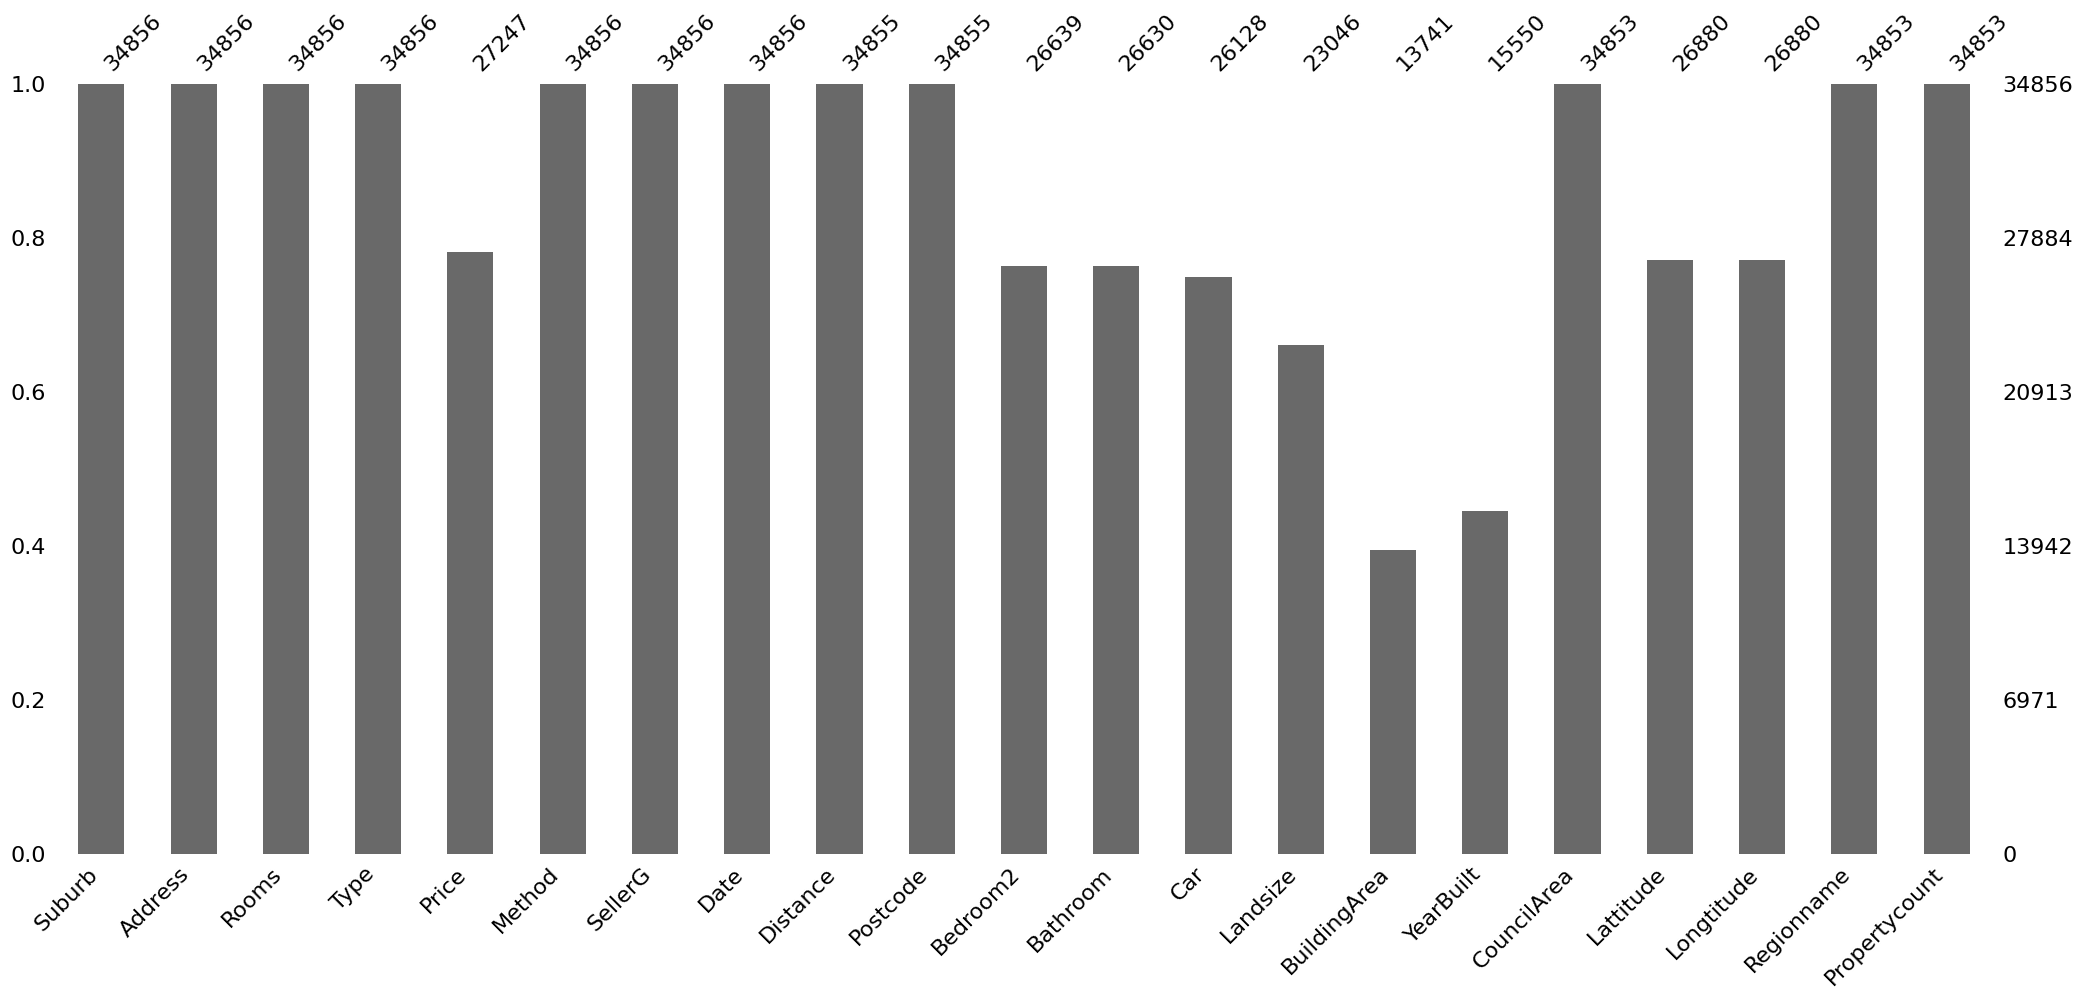

In [15]:
#show the bar of missing values
msno.bar(df)

In [16]:
#Calculate the percentage of missing values in each column
df.isna().mean().round(4) * 100

Suburb            0.00
Address           0.00
Rooms             0.00
Type              0.00
Price            21.83
Method            0.00
SellerG           0.00
Date              0.00
Distance          0.00
Postcode          0.00
Bedroom2         23.57
Bathroom         23.60
Car              25.04
Landsize         33.88
BuildingArea     60.58
YearBuilt        55.39
CouncilArea       0.01
Lattitude        22.88
Longtitude       22.88
Regionname        0.01
Propertycount     0.01
dtype: float64

In [17]:
df.shape

(34856, 21)

In [18]:
#Drop na values of price column
df.dropna(subset=["Price"], inplace=True)

In [19]:
df.shape

(27247, 21)

In [20]:
#Check for missing values
print(df.isna().sum())

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          6441
Bathroom          6447
Car               6824
Landsize          9265
BuildingArea     16591
YearBuilt        15163
CouncilArea          3
Lattitude         6254
Longtitude        6254
Regionname           3
Propertycount        3
dtype: int64


# DATA PREPROCESSING

In [21]:
#Drop columns with more than 50% missing values
df.dropna(thresh=0.5*len(df), axis=1, inplace=True)

In [22]:
#Number of missing values in each column
print(df.isna().sum())

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            1
Postcode            1
Bedroom2         6441
Bathroom         6447
Car              6824
Landsize         9265
CouncilArea         3
Lattitude        6254
Longtitude       6254
Regionname          3
Propertycount       3
dtype: int64


In [23]:
num_cols=['Distance', 'Landsize', 'Lattitude', 'Longtitude', 'Propertycount' ]

In [24]:
#Checking Bathroom column before filling missing values
df.Bathroom.value_counts()

Bathroom
1.0    10527
2.0     8464
3.0     1537
4.0      176
5.0       46
0.0       34
6.0       10
8.0        3
7.0        2
9.0        1
Name: count, dtype: int64

In [25]:
#Checking Bedroom2 column before filling missing values
df.Bedroom2.value_counts()

Bedroom2
3.0     9416
4.0     4766
2.0     4696
5.0      983
1.0      781
6.0      110
7.0       19
0.0       16
8.0        9
10.0       4
9.0        3
20.0       1
16.0       1
12.0       1
Name: count, dtype: int64

In [26]:
#Fill Distance with mean
df["Distance"].fillna(df["Distance"].mean(), inplace=True)

#Fill bedroom2 with 1 
df["Bedroom2"].fillna(1, inplace=True)

#Fill Bathroom with 1 according to the description of the dataset
df["Bathroom"].fillna(1, inplace=True)

#Fill Car with mean
df["Car"].fillna(df["Car"].mean(), inplace=True)

#Fill Lattitude with median
df["Lattitude"].fillna(df["Lattitude"].median(), inplace=True)

#Fill Longtitude with  median
df["Longtitude"].fillna(df["Longtitude"].median(), inplace=True)

#Fill Propertycount with median
df["Propertycount"].fillna(df["Propertycount"].median(), inplace=True)

#Fill Landsize with median
df["Landsize"].fillna(df["Landsize"].median(), inplace=True)


In [27]:
#show the nan postcode
df[df["Postcode"].isna()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
29483,Fawkner Lot,1/3 Brian St,3,h,616000.0,SP,Brad,6/01/2018,11.280276,NaN,1.0,1.0,1.71537,512.0,NaN,-37.80046,145.0032,NaN,6567.0


In [28]:
#Fill Postcode with median
df['Postcode'].fillna(df['Postcode'].median(), inplace = True)

In [29]:
#show the nan council area
df[df["CouncilArea"].isna()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
18523,Footscray,2/16 Stafford St,2,u,710000.0,S,Jas,15/07/2017,5.100000,3011.0,1.0,1.0,1.71537,512.0,NaN,-37.80046,145.0032,NaN,6567.0
26888,Camberwell,2/3 Kingsley St,2,h,825000.0,VB,Jellis,11/11/2017,7.700000,3124.0,1.0,1.0,1.71537,512.0,NaN,-37.80046,145.0032,NaN,6567.0
29483,Fawkner Lot,1/3 Brian St,3,h,616000.0,SP,Brad,6/01/2018,11.280276,3088.0,1.0,1.0,1.71537,512.0,NaN,-37.80046,145.0032,NaN,6567.0


In [30]:
#Fill CouncilArea with the most frequent value
df.loc[(df['CouncilArea'].isna()) & (df['Postcode']==3011) , 'CouncilArea'] = "Maribyrnong City Council"
df.loc[(df['CouncilArea'].isna()) & (df['Postcode']==3124) , 'CouncilArea'] = "Boroondara City Council"
df.loc[(df['CouncilArea'].isna()) & (df['Postcode']==3088) , 'CouncilArea'] = "Boroondara City Council"

In [31]:
#show the nan regionname 
df[df["Regionname"].isna()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
18523,Footscray,2/16 Stafford St,2,u,710000.0,S,Jas,15/07/2017,5.100000,3011.0,1.0,1.0,1.71537,512.0,Maribyrnong City Council,-37.80046,145.0032,NaN,6567.0
26888,Camberwell,2/3 Kingsley St,2,h,825000.0,VB,Jellis,11/11/2017,7.700000,3124.0,1.0,1.0,1.71537,512.0,Boroondara City Council,-37.80046,145.0032,NaN,6567.0
29483,Fawkner Lot,1/3 Brian St,3,h,616000.0,SP,Brad,6/01/2018,11.280276,3088.0,1.0,1.0,1.71537,512.0,Boroondara City Council,-37.80046,145.0032,NaN,6567.0


In [32]:
#Fill Regionname with the most frequent value
df.loc[(df['Regionname'].isna()) & (df['Postcode']==3011) , 'Regionname'] = "Southern Metropolitan"
df.loc[(df['Regionname'].isna()) & (df['Postcode']==3124) , 'Regionname'] = "Southern Metropolitan"
df.loc[(df['Regionname'].isna()) & (df['Postcode']==3088) , 'Regionname'] = "Western Metropolitan"

In [33]:
#Check for any missing values
df.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [34]:
#Shape of data
df.shape

(27247, 19)

In [35]:
# Define a function to detect outliers using Z-score
def detect_z_score_outliers(df, col_name, threshold=3):
    mean = df[col_name].mean()
    std = df[col_name].std()
    z_scores = ((df[col_name] - mean) / std).abs()
    outliers = z_scores > threshold
    return outliers
# Setting the threshold to 3
z_score_threshold = 3

In [36]:
# Detect outliers for each numerical column
outliers_dict = {}
for col in num_cols:
    outliers = detect_z_score_outliers(df, col, z_score_threshold)
    num_outliers = outliers.sum()
    outliers_dict[col] = num_outliers

 # Print the number of outliers for each numerical column
for col, num_outliers in outliers_dict.items():
    print(f"{col}: {num_outliers} outliers")

Distance: 628 outliers
Landsize: 38 outliers
Lattitude: 346 outliers
Longtitude: 475 outliers
Propertycount: 727 outliers


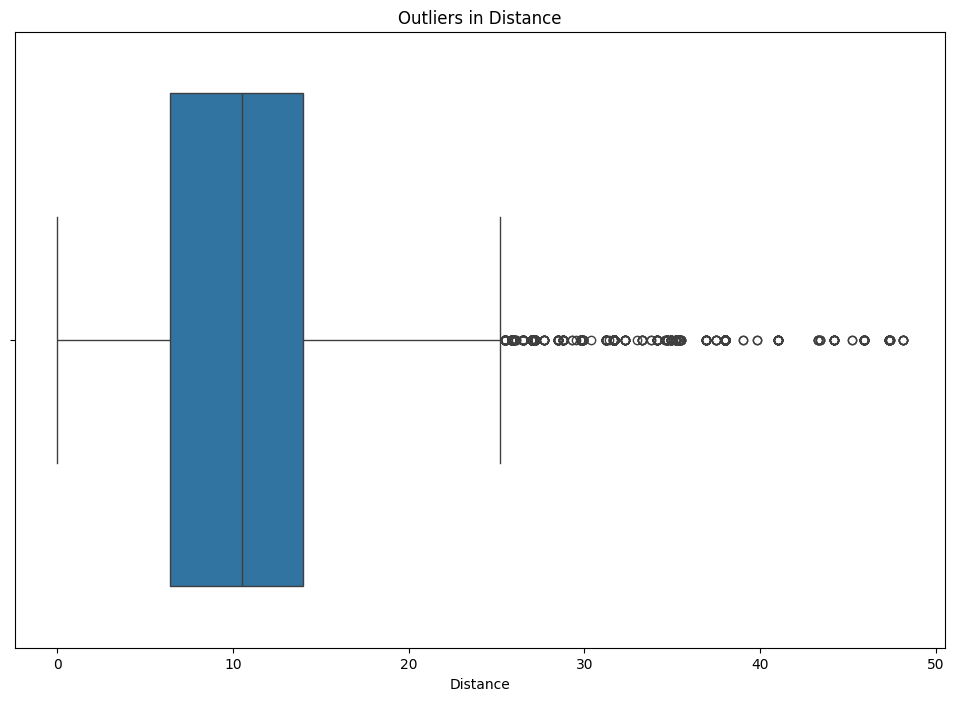

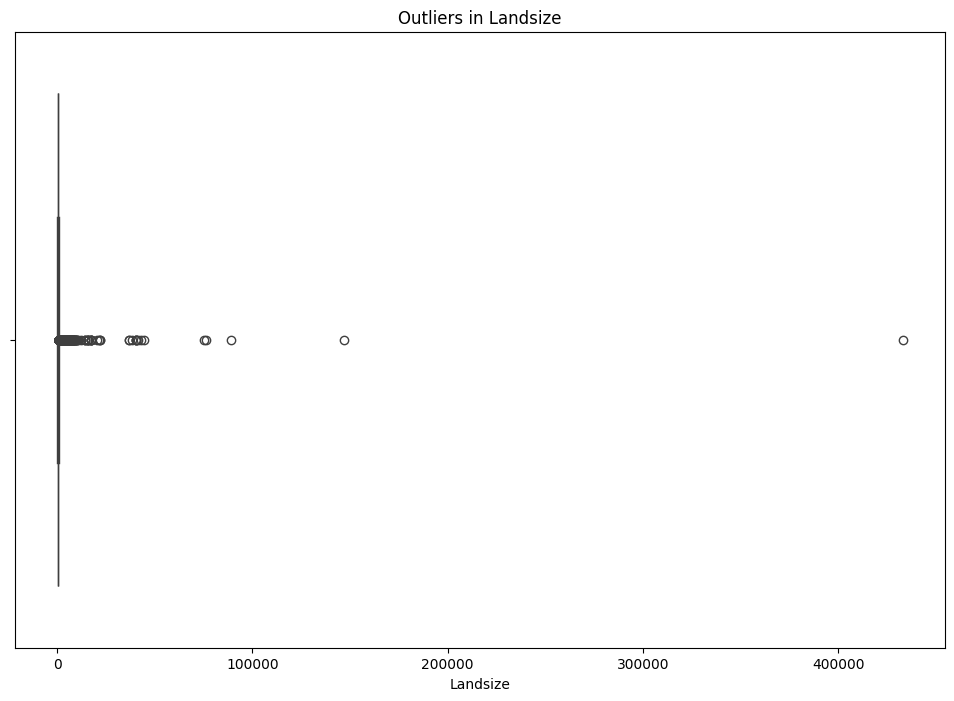

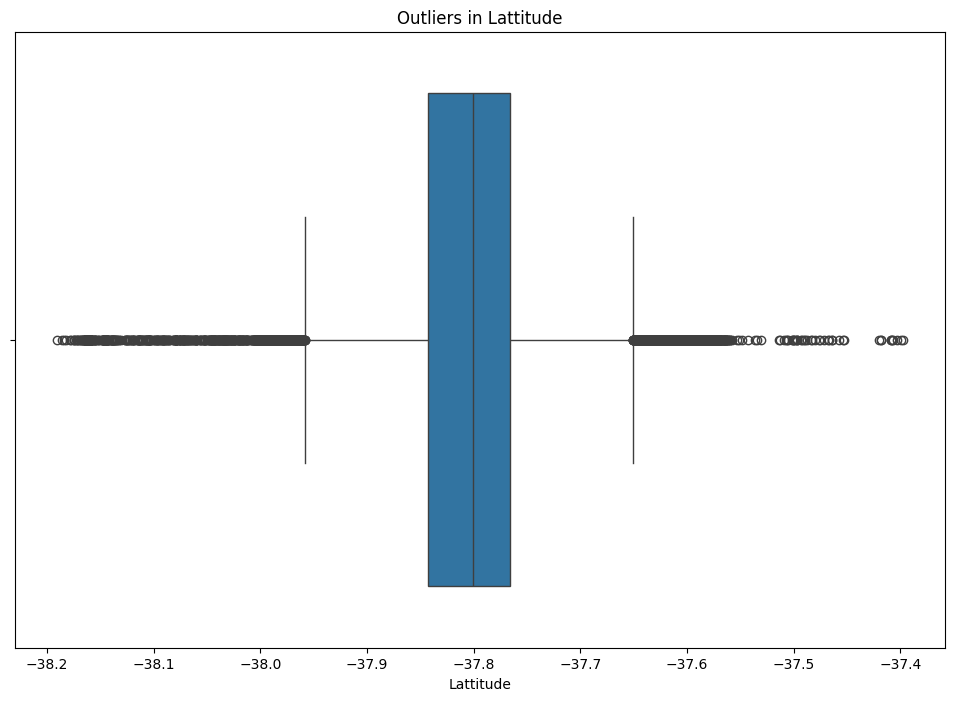

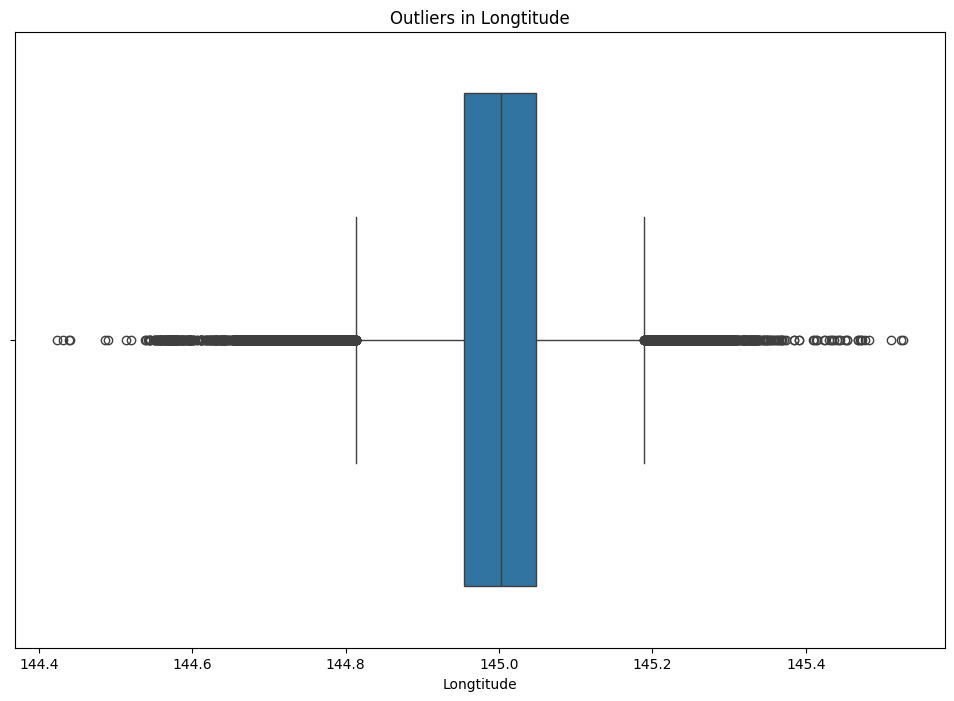

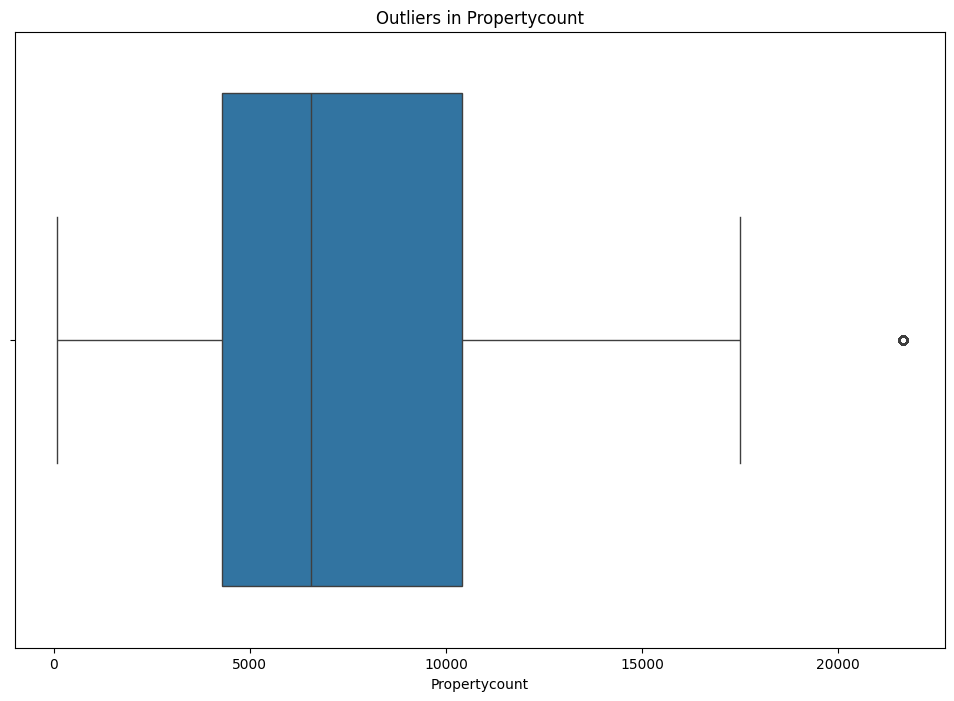

In [37]:
# Plot the outliers for each numerical column
for col in num_cols:
    outliers = detect_z_score_outliers(df, col, z_score_threshold)
    
    # Check if there are any outliers for the current column
    if outliers.any():
        plt.figure(figsize=(12, 8)) 
        sns.boxplot(x=df[col])
        plt.title(f"Outliers in {col}")
        plt.show()
    else:
        print(f"No outliers found in {col}")

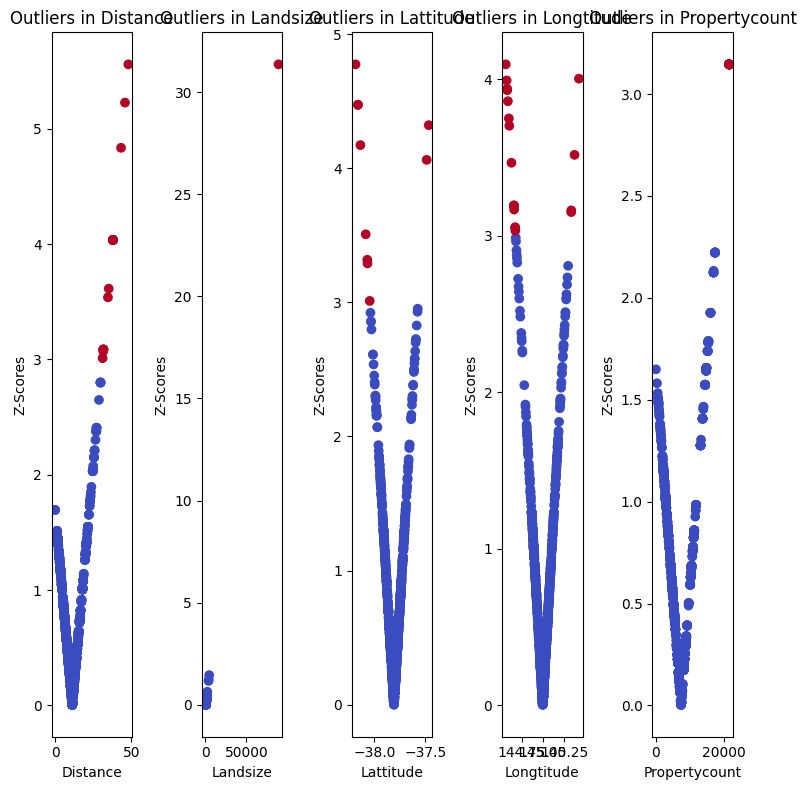

In [38]:

# Subsample the data to speed up the plotting
sample_size = 1000  # Adjust the sample size as needed
sampled_data = df.sample(n=sample_size, random_state=42)

# Creating scatter plots to visualize outliers for a subset of numerical columns
plt.figure(figsize=(12, 8))

# Adjusting the number of columns to plot as needed
for i, col in enumerate(num_cols[:8]):  
    plt.subplot(1, 8, i + 1)
    
    # Calculate Z-scores for outliers
    mean = sampled_data[col].mean()
    std = sampled_data[col].std()
    z_scores = ((sampled_data[col] - mean) / std).abs()
    outliers = z_scores > z_score_threshold
    
    # Creating a scatter plot to visualize outliers
    plt.scatter(sampled_data[col], z_scores, c=outliers, cmap='coolwarm')
    plt.title(f"Outliers in {col}")
    plt.xlabel(col)
    plt.ylabel("Z-Scores")

plt.tight_layout()
plt.show()


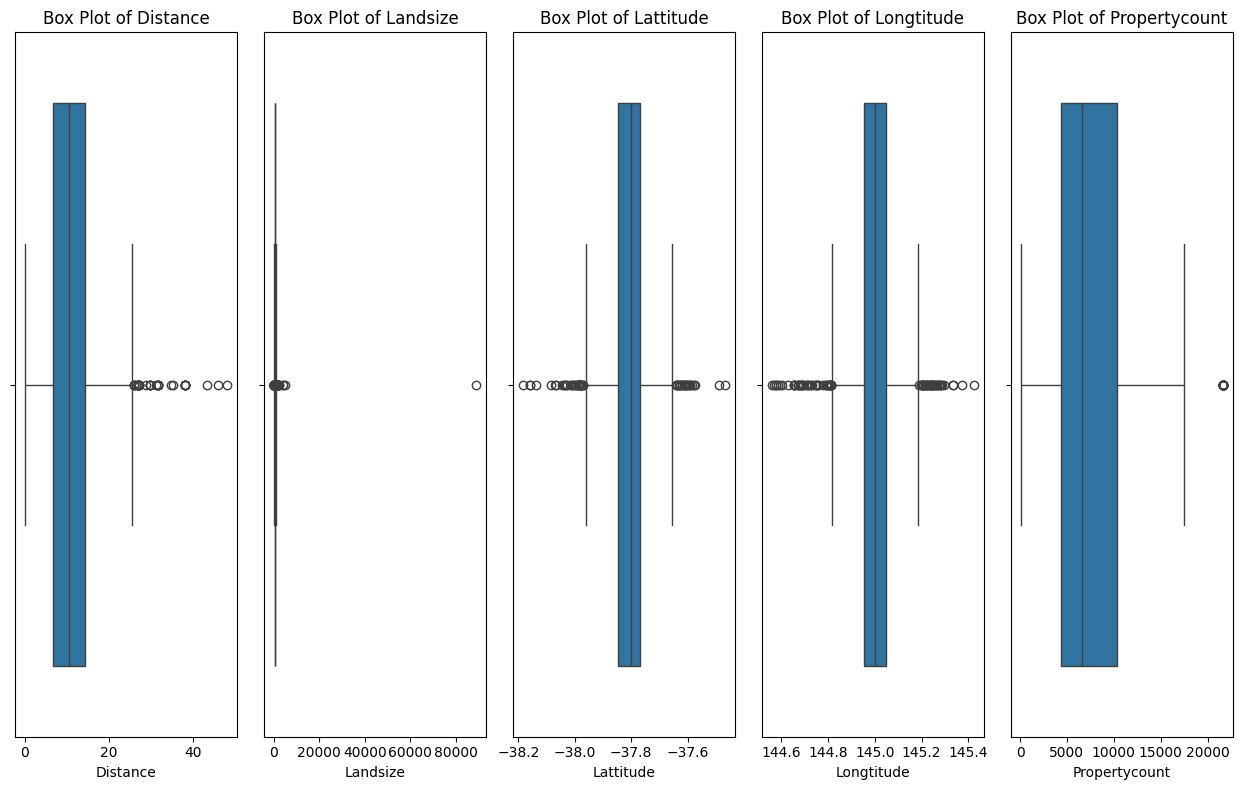

In [39]:
plt.figure(figsize=(20, 8))

# Adjusting the number of columns to plot as needed
for i, col in enumerate(num_cols[:8]):  
    plt.subplot(1, 8, i + 1)
    
    # Calculate Z-scores for outliers
    mean = sampled_data[col].mean()
    std = sampled_data[col].std()
    z_scores = ((sampled_data[col] - mean) / std).abs()
    outliers = z_scores > z_score_threshold
    
    # Creating a boxplot to visualize the column
    sns.boxplot(sampled_data, x=col)
    plt.title(f"Box Plot of {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()


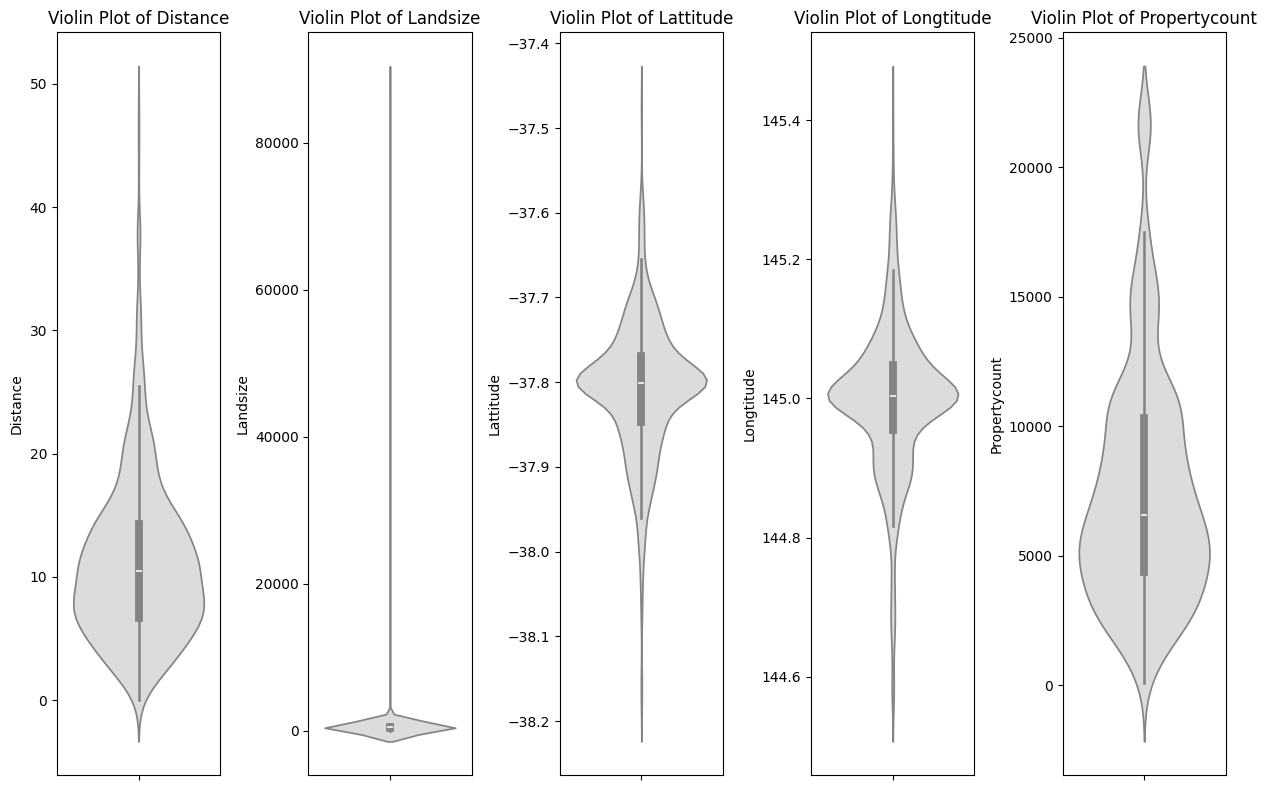

In [40]:
plt.figure(figsize=(20, 8))

# Adjusting the number of columns to plot as needed
for i, col in enumerate(num_cols[:8]):  
    plt.subplot(1, 8, i + 1)
    
    # Calculate Z-scores for outliers
    mean = sampled_data[col].mean()
    std = sampled_data[col].std()
    z_scores = ((sampled_data[col] - mean) / std).abs()
    outliers = z_scores > z_score_threshold
    
    # Creating a violin plot to visualize the column
    sns.violinplot(y=sampled_data[col], palette='coolwarm')
    plt.title(f"Violin Plot of {col}")
    plt.ylabel(col)

plt.tight_layout()
plt.show()


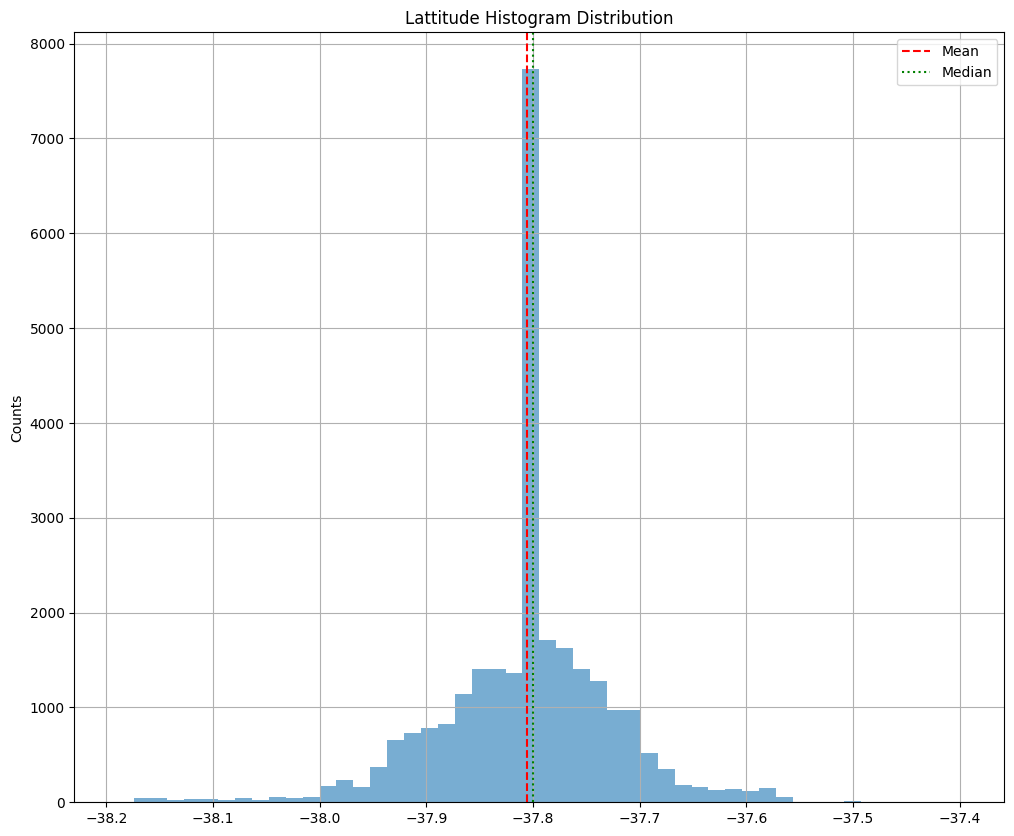

In [41]:
# Plotting outliers with histogram with mean and median for Lattitude
plt.figure(figsize=(12, 10))

df['Lattitude'].hist(bins=50, alpha=0.6)
plt.axvline(np.mean(df['Lattitude']), ls='--', c='r', label="Mean")
plt.axvline(np.median(df['Lattitude']), ls=':', c='g', label="Median")
plt.ylabel("Counts")
plt.title("Lattitude Histogram Distribution")
plt.legend()

In [42]:
# Calculating the Z-scores for the numeric columns 
z_scores = np.abs(stats.zscore(df[num_cols]))

#Counting of outliers in each column
outlier_counts = (z_scores > z_score_threshold).sum(axis=0)
print(outlier_counts)

#Remove the outliers from the DataFrame
outlier_indices = (z_scores > z_score_threshold).any(axis=1)
df_no_outliers = df[~outlier_indices]


Distance         628
Landsize          38
Lattitude        346
Longtitude       475
Propertycount    727
dtype: int64


In [43]:
#checking shape for outliers
print(df.shape)
print(df_no_outliers.shape)


(27247, 19)
(25522, 19)


# DATA VISUALIZATION

In [44]:
# Function to format x-axis labels as thousands (k) and millions (M)
def price_formatter(x, pos):
    if x >= 1e6:  # If the price is in millions
        return f"${x / 1e6:.1f}M"
    elif x >= 1e3:  # If the price is in thousands
        return f"${x / 1e3:.0f}k"
    else:
        return f"${x:.0f}"

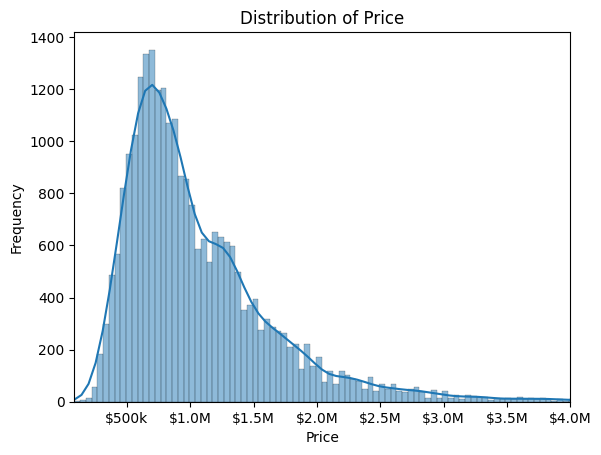

In [45]:
#Distribution of the 'Price' variable
sns.histplot(df_no_outliers['Price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(85000, 4000000)
plt.gca().xaxis.set_major_formatter(FuncFormatter(price_formatter))
plt.show()

<Figure size 2000x1000 with 0 Axes>

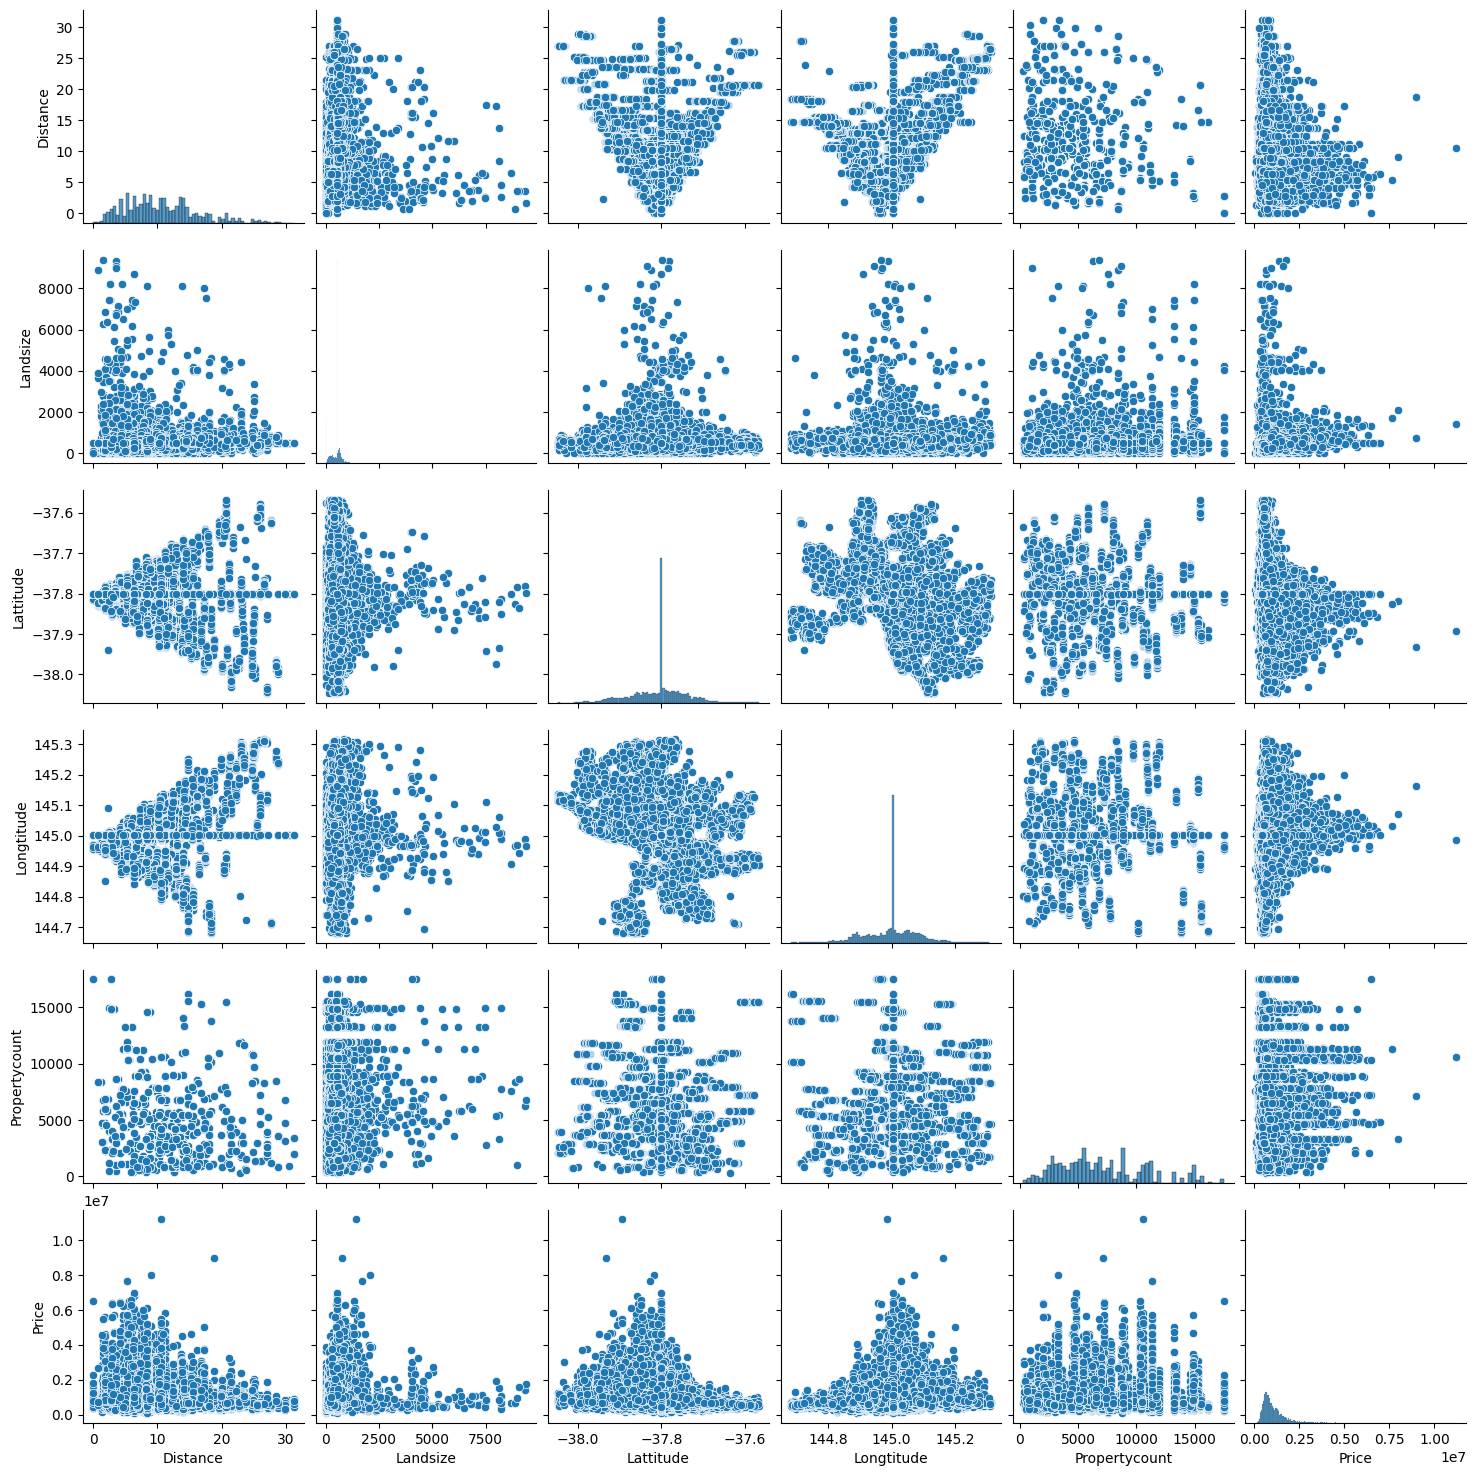

In [46]:
#Draw a pair plot to see the relationship between all numerical variables and the price variable.
plt.figure(figsize=(20, 10))
sns.pairplot(df_no_outliers[num_cols + ["Price"]])
plt.show()

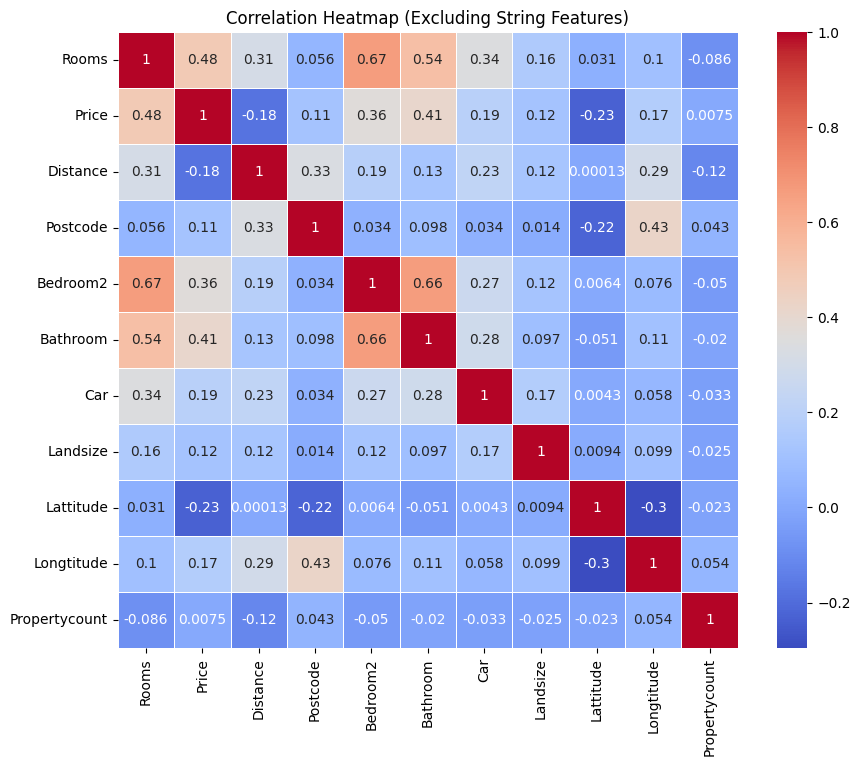

In [47]:
# Data correlation
data_corr = df_no_outliers.select_dtypes(exclude=['object'])

#Compute the correlation matrix
correlation_matrix = data_corr.corr()

#Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap (Excluding String Features)")

plt.show()

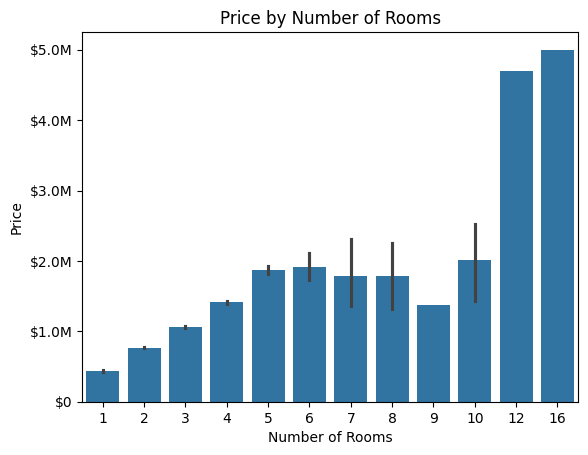

In [48]:
# Box plot to visualize the distribution of prices by the number of rooms
sns.barplot(x='Rooms', y='Price', data=df_no_outliers)
plt.title('Price by Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.gca().yaxis.set_major_formatter(FuncFormatter(price_formatter))
plt.show()

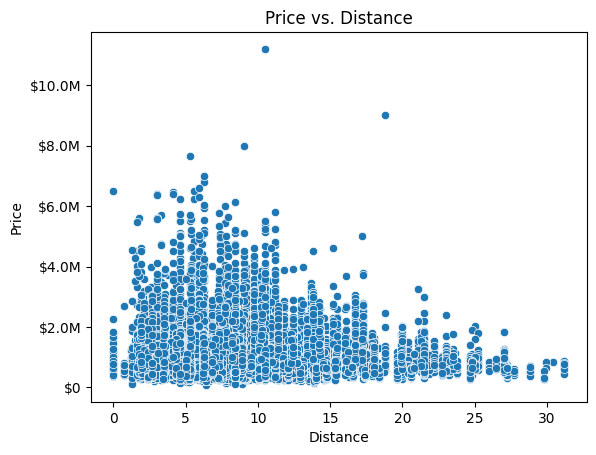

In [49]:
#Scatter plot for Price vs. Distance
sns.scatterplot(x='Distance', y='Price', data=df_no_outliers)
plt.title('Price vs. Distance')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.gca().yaxis.set_major_formatter(FuncFormatter(price_formatter))
plt.show()

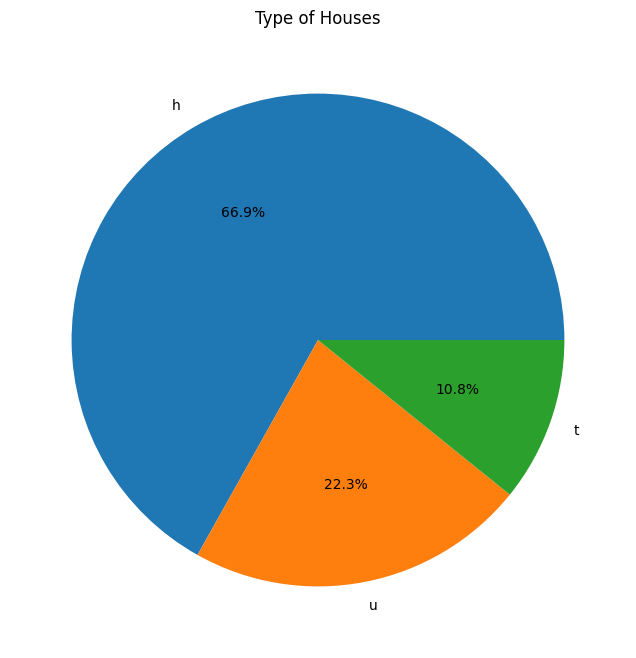

In [49]:
#Type of houses among the dataset
plt.figure(figsize=(8, 8))
df_no_outliers['Type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Type of Houses')
plt.ylabel('')
plt.show()

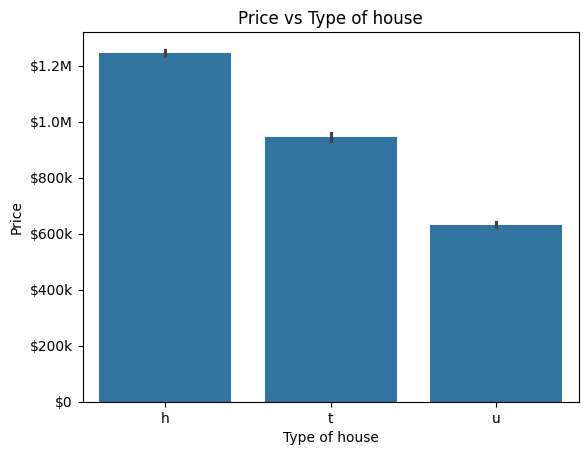

In [50]:
#Price vs Type of house
sns.barplot(x='Type', y='Price', data=df_no_outliers)
plt.title('Price vs Type of house')
plt.xlabel('Type of house')
plt.ylabel('Price')
plt.gca().yaxis.set_major_formatter(FuncFormatter(price_formatter))
plt.show()

# DATA ENCODING

In [51]:
# List for One-Hot Encoding
ohe_encoding_list = [
    'Type',
    'Method',
    'Rooms',
    'Postcode',
    'Regionname',
    'CouncilArea',
    ]

In [52]:
# List for Label Encoding
label_encoding_list = [
    'Suburb',
    'SellerG',
    ]

In [53]:
#Label Encoding
labelencoder = LabelEncoder()
for col in label_encoding_list:
    df_no_outliers[col] = labelencoder.fit_transform(df_no_outliers[col])

In [54]:
#One-hot encoding
df_encoded = pd.get_dummies(df_no_outliers, columns=ohe_encoding_list, drop_first=True,dtype=int)

In [55]:
#Data after encoding
df_encoded.head()

,Suburb,Address,Price,SellerG,Date,Distance,Bedroom2,Bathroom,Car,Landsize,...,CouncilArea_Moonee Valley City Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,0,85 Turner St,1480000.0,28,3/12/2016,2.5,2.0,1.0,1.0,202.0,...,0,0,0,0,0,0,0,0,1,0
2,0,25 Bloomburg St,1035000.0,28,4/02/2016,2.5,2.0,1.0,0.0,156.0,...,0,0,0,0,0,0,0,0,1,0
4,0,5 Charles St,1465000.0,28,4/03/2017,2.5,3.0,2.0,0.0,134.0,...,0,0,0,0,0,0,0,0,1,0
5,0,40 Federation La,850000.0,28,4/03/2017,2.5,3.0,2.0,1.0,94.0,...,0,0,0,0,0,0,0,0,1,0
6,0,55a Park St,1600000.0,185,4/06/2016,2.5,3.0,1.0,2.0,120.0,...,0,0,0,0,0,0,0,0,1,0


In [56]:
#Shape of data after encoding
df_encoded.shape

(25522, 236)

In [57]:
# Dont want to address column to try something else
# Using tokinezer process a list of texts and returns a sequence of integer values.
def get_sequences(texts):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(texts)
    
    vocab_length = len(tokenizer.word_index) + 1
    print("Vocab length:", vocab_length)
    
    sequences = tokenizer.texts_to_sequences(texts)
    
    max_seq_length = np.max([len(sequence) for sequence in sequences])
    print("Max sequence length:", max_seq_length)
    
    sequences = pad_sequences(sequences, maxlen=max_seq_length, padding='post')
    
    return sequences

In [58]:
# Get sequences for the Address column
addr_sequences = get_sequences(df_encoded['Address'])

Vocab length: 7614
Max sequence length: 5


In [59]:
# Check the type of the sequences
type(addr_sequences)

numpy.ndarray

In [60]:
# Dataframe of sequences before concatenation to the main dataframe
addr_df = pd.DataFrame(addr_sequences)

In [61]:
addr_df

,0,1,2,3,4
0,128,601,1,0,0
1,32,4412,1,0,0
2,9,107,1,0,0
3,52,1563,63,0,0
4,3122,64,1,0,0
...,...,...,...,...,...
25517,19,412,1,0,0
25518,892,96,1,0,0
25519,2487,528,1,0,0
25520,21,44,392,1,0


In [62]:
#Convert addr_df's columns to integers before encoding
addr_df = addr_df.astype(int)

In [63]:
df_encoded.shape

(25522, 236)

In [ ]:
"""
#Create date features
df_encoded['Date'] = pd.to_datetime(df_encoded['Date'],dayfirst=True)

df_encoded['Year'] = df_encoded['Date'].apply(lambda x: x.year)
df_encoded['Month'] = df_encoded['Date'].apply(lambda x: x.month)
df_encoded['Day'] = df_encoded['Date'].apply(lambda x: x.day)

df_encoded = df_encoded.drop('Date', axis=1)

df_encoded = df_encoded.dropna(axis=0).reset_index(drop=True)
"""

"\n#Create date features\ndf_encoded['Date'] = pd.to_datetime(df_encoded['Date'],dayfirst=True)\n\ndf_encoded['Year'] = df_encoded['Date'].apply(lambda x: x.year)\ndf_encoded['Month'] = df_encoded['Date'].apply(lambda x: x.month)\ndf_encoded['Day'] = df_encoded['Date'].apply(lambda x: x.day)\n\ndf_encoded = df_encoded.drop('Date', axis=1)\n\ndf_encoded = df_encoded.dropna(axis=0).reset_index(drop=True)\n"

In [64]:
# split the data into X and y
X = df_encoded.drop(['Price','Address','Date'], axis=1)
y = df_encoded['Price']

In [65]:
# Shape of X
X.shape

(25522, 233)

In [66]:
X

,Suburb,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,...,CouncilArea_Moonee Valley City Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,0,28,2.5,2.0,1.0,1.00000,202.0,-37.79960,144.99840,4019.0,...,0,0,0,0,0,0,0,0,1,0
2,0,28,2.5,2.0,1.0,0.00000,156.0,-37.80790,144.99340,4019.0,...,0,0,0,0,0,0,0,0,1,0
4,0,28,2.5,3.0,2.0,0.00000,134.0,-37.80930,144.99440,4019.0,...,0,0,0,0,0,0,0,0,1,0
5,0,28,2.5,3.0,2.0,1.00000,94.0,-37.79690,144.99690,4019.0,...,0,0,0,0,0,0,0,0,1,0
6,0,185,2.5,3.0,1.0,2.00000,120.0,-37.80720,144.99410,4019.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,291,129,6.3,4.0,1.0,3.00000,593.0,-37.81053,144.88467,6543.0,...,0,0,0,0,0,0,0,0,0,0
34853,291,264,6.3,2.0,2.0,1.00000,98.0,-37.81551,144.88826,6543.0,...,0,0,0,0,0,0,0,0,0,0
34854,291,129,6.3,2.0,1.0,2.00000,220.0,-37.82286,144.87856,6543.0,...,0,0,0,0,0,0,0,0,0,0
34855,291,305,6.3,1.0,1.0,1.71537,512.0,-37.80046,145.00320,6543.0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
# Resetting index before concatenation
X.reset_index(drop=True, inplace=True)
addr_df.reset_index(drop=True, inplace=True)

In [69]:
#concat the X and addr_df 
X = pd.concat([X, addr_df], axis=1)

In [68]:
X.shape

(25522, 233)

In [69]:
X

,Suburb,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,...,CouncilArea_Moonee Valley City Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
0,0,28,2.5,2.0,1.0,1.00000,202.0,-37.79960,144.99840,4019.0,...,0,0,0,0,0,0,0,0,1,0
1,0,28,2.5,2.0,1.0,0.00000,156.0,-37.80790,144.99340,4019.0,...,0,0,0,0,0,0,0,0,1,0
2,0,28,2.5,3.0,2.0,0.00000,134.0,-37.80930,144.99440,4019.0,...,0,0,0,0,0,0,0,0,1,0
3,0,28,2.5,3.0,2.0,1.00000,94.0,-37.79690,144.99690,4019.0,...,0,0,0,0,0,0,0,0,1,0
4,0,185,2.5,3.0,1.0,2.00000,120.0,-37.80720,144.99410,4019.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25517,291,129,6.3,4.0,1.0,3.00000,593.0,-37.81053,144.88467,6543.0,...,0,0,0,0,0,0,0,0,0,0
25518,291,264,6.3,2.0,2.0,1.00000,98.0,-37.81551,144.88826,6543.0,...,0,0,0,0,0,0,0,0,0,0
25519,291,129,6.3,2.0,1.0,2.00000,220.0,-37.82286,144.87856,6543.0,...,0,0,0,0,0,0,0,0,0,0
25520,291,305,6.3,1.0,1.0,1.71537,512.0,-37.80046,145.00320,6543.0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
y

1        1480000.0
2        1035000.0
4        1465000.0
5         850000.0
6        1600000.0
           ...    
34852    1480000.0
34853     888000.0
34854     705000.0
34855    1140000.0
34856    1020000.0
Name: Price, Length: 25239, dtype: float64

In [73]:
# Before standardization changing type of the columns to str
X.columns = X.columns.astype(str)

In [74]:
#standardize the data
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
"""
#MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
"""

'\n#MinMaxScaler\nfrom sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler()\nX_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)\n'

In [75]:
X_scaled

,Suburb,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,...,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,0,1,2,3,4
0,-1.697735,-1.377177,-1.461899,-0.449118,-0.671937,-0.818453,-0.685509,0.101318,-0.019627,-0.809088,...,-0.132429,-0.139089,-0.108376,5.161786,-0.033326,-0.137130,-0.480735,-0.391716,-0.079228,-0.029484
1,-1.697735,-1.377177,-1.461899,-0.449118,-0.671937,-1.991668,-0.790185,-0.019668,-0.073685,-0.809088,...,-0.132429,-0.139089,-0.108376,5.161786,-0.033326,-0.263751,1.557785,-0.391716,-0.079228,-0.029484
2,-1.697735,-1.377177,-1.461899,0.378456,0.830323,-1.991668,-0.840247,-0.040075,-0.062874,-0.809088,...,-0.132429,-0.139089,-0.108376,5.161786,-0.033326,-0.290884,-0.747736,-0.391716,-0.079228,-0.029484
3,-1.697735,-1.377177,-1.461899,0.378456,0.830323,-0.818453,-0.931270,0.140675,-0.035845,-0.809088,...,-0.132429,-0.139089,-0.108376,5.161786,-0.033326,-0.235326,0.040810,-0.324574,-0.079228,-0.029484
4,-1.697735,0.360686,-1.461899,0.378456,-0.671937,0.354763,-0.872105,-0.009464,-0.066117,-0.809088,...,-0.132429,-0.139089,-0.108376,5.161786,-0.033326,3.695093,-0.771024,-0.391716,-0.079228,-0.029484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25234,1.803040,-0.259189,-0.755646,1.206031,-0.671937,1.527978,0.204235,-0.058004,-1.249230,-0.142700,...,-0.132429,-0.139089,-0.108376,-0.193731,-0.033326,-0.275379,-0.582011,-0.391716,-0.079228,-0.029484
25235,1.803040,1.224083,-0.755646,-0.449118,0.830323,-0.818453,-0.922167,-0.130596,-1.210416,-0.142700,...,-0.132429,-0.139089,-0.108376,-0.193731,-0.033326,0.844829,-0.753152,-0.391716,-0.079228,-0.029484
25236,1.803040,-0.259189,-0.755646,-0.449118,-0.671937,0.354763,-0.644549,-0.237734,-1.315288,-0.142700,...,-0.132429,-0.139089,-0.108376,-0.193731,-0.033326,2.894021,-0.520813,-0.391716,-0.079228,-0.029484
25237,1.803040,1.677919,-0.755646,-1.276692,-0.671937,0.020830,0.019914,0.088782,0.032268,-0.142700,...,-0.132429,-0.139089,-0.108376,-0.193731,-0.033326,-0.276671,-0.781856,0.012170,-0.073824,-0.029484


In [80]:
# Creating Dictionary for models

models = {
    'Lasso': {
        'model': Lasso()
    },

    'Ridge': {
        'model': Ridge()
    },

    'ElasticNet': {
        'model': ElasticNet()
    },
    
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor()
    },

    'RandomForestRegressor': {
        'model': RandomForestRegressor()
    },
    
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor()
    },
    
    'AdaBoostRegressor': {
        'model': AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2)
    },
    'XGBoostRegressor': {  
        'model': XGBRegressor()
    }
}



In [83]:
def evaluate_models(models, X, y):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
    
    for model_name, model_config in models.items():
        model = model_config['model']
        
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the test data
        y_pred = model.predict(X_test)
        
        # Calculate the accuracy (R-squared score)
        accuracy = r2_score(y_test, y_pred)
        print(f"{model_name} - R-squared: {accuracy:.4f}")

        #Calculate the MAE
        mae = mean_absolute_error(y_test, y_pred)
        print(f"{model_name} - MAE: {mae:.4f}")

        #Calculate the MSE
        mse = mean_squared_error(y_test, y_pred)
        print(f"{model_name} - MSE: {mse:.4f}")

        #Calculate the RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        print(f"{model_name} - RMSE: {rmse:.4f}")
        
        print("--------------------------------------------------")

# Calling the function
evaluate_models(models, X_scaled, y)


Lasso - R-squared: 0.6562
--------------------------------------------------
Ridge - R-squared: 0.6563
--------------------------------------------------
ElasticNet - R-squared: 0.5987
--------------------------------------------------
KNeighborsRegressor - R-squared: 0.6765
--------------------------------------------------
RandomForestRegressor - R-squared: 0.7785
--------------------------------------------------
GradientBoostingRegressor - R-squared: 0.7361
--------------------------------------------------
AdaBoostRegressor - R-squared: 0.4935
--------------------------------------------------
XGBoostRegressor - R-squared: 0.7991
--------------------------------------------------
